# Data Visualization Tutorial 4

## Load and Setup the Data

In [1]:
# import required library functions
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data, skip the top 20 and bottom 2 rows as they do not contain relevant data
df_canada = pd.read_excel('data/canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)

# conversion index and columns to lists
#df_canada.columns.tolist()
#df_canada.index.tolist()

# remove unnecessary columns
# in pandas axis=0 re|presents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename some columns to make better sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# convert all column names to strings
df_canada.columns = list(map(str, df_canada.columns))

# full range of the time series
years = list(map(str, range(1980, 2014)))

# add Total column
df_canada['Total'] = df_canada.sum(axis=1)

# index data by country
df_canada.set_index('Country', inplace=True)

## Visualize Frequency Distribution

### Visualize immigration into Canada from Scandinavia

In [4]:
# let's quickly view the dataset 
df_scandinavia = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years]

df_scandinavia.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


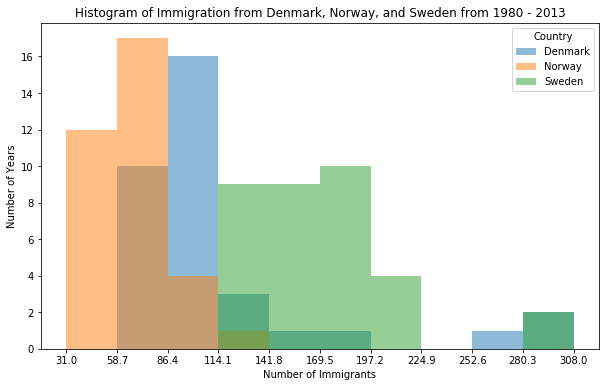

In [9]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_scandinavia.transpose(), 10)

# generate histogram
df_scandinavia.transpose().plot(kind='hist',
                    figsize=(10, 6),
                    bins=10,
                    alpha=0.5,
                    xticks=bin_edges,
                   )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Visualize Data Distribution

### Visualize Box Plot of immigration to Canada from India

In [10]:
# to get a dataframe, place extra square brackets around 'India'.
df_india = df_canada.loc[['India'], years].transpose()
df_india.head()

Country,India
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704


In [11]:
df_india.describe()

Country,India
count,34.000000
mean,20350.117647
std,10007.342579
min,4211.000000
25%,10637.750000
50%,20235.000000
75%,28699.500000
max,36210.000000


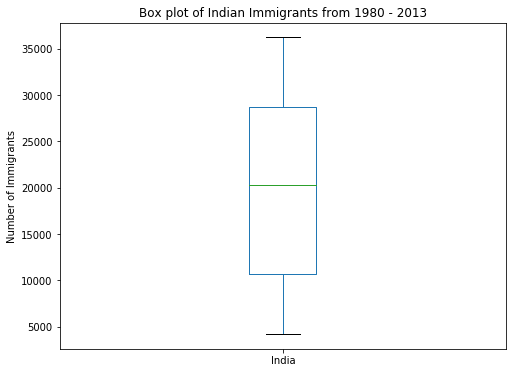

In [12]:
# plot the distribution pattern
df_india.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Indian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

### Compare total continent wise distribution over the years 1980 to 2013

In [13]:
import seaborn as sns

In [16]:
# group by Continent
df_continents = df_canada.groupby(['Continent'], axis = 0).sum()

df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [17]:
df_continents[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


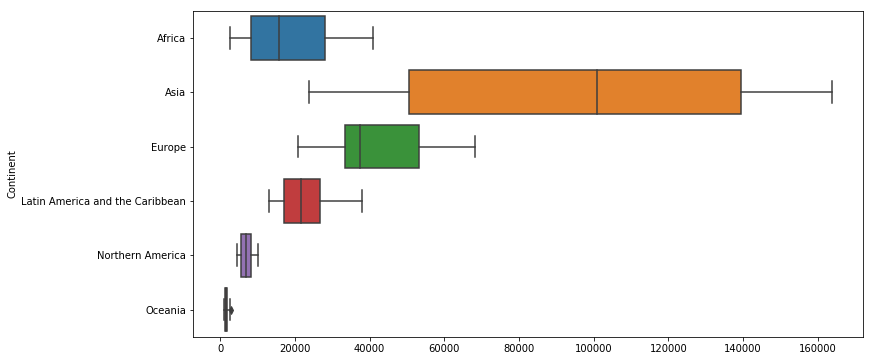

In [21]:
# plot multiple distributions side by side
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_continents[years].transpose(), orient='h')

## Visualize Heatmap

### Visualize total immigration contributions from each continent over time

In [22]:
import seaborn as sns

### Data as a Table

In [23]:
# group by Continent
df_continents = df_canada.groupby(['Continent'], axis = 0).sum()

df_continents.head(6)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


### Data as a Heatmap

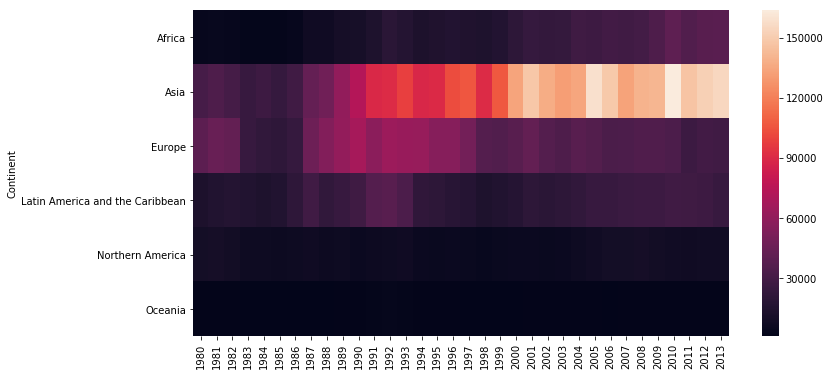

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(data=df_continents[years])

### Whole country wise data as a Heatmap

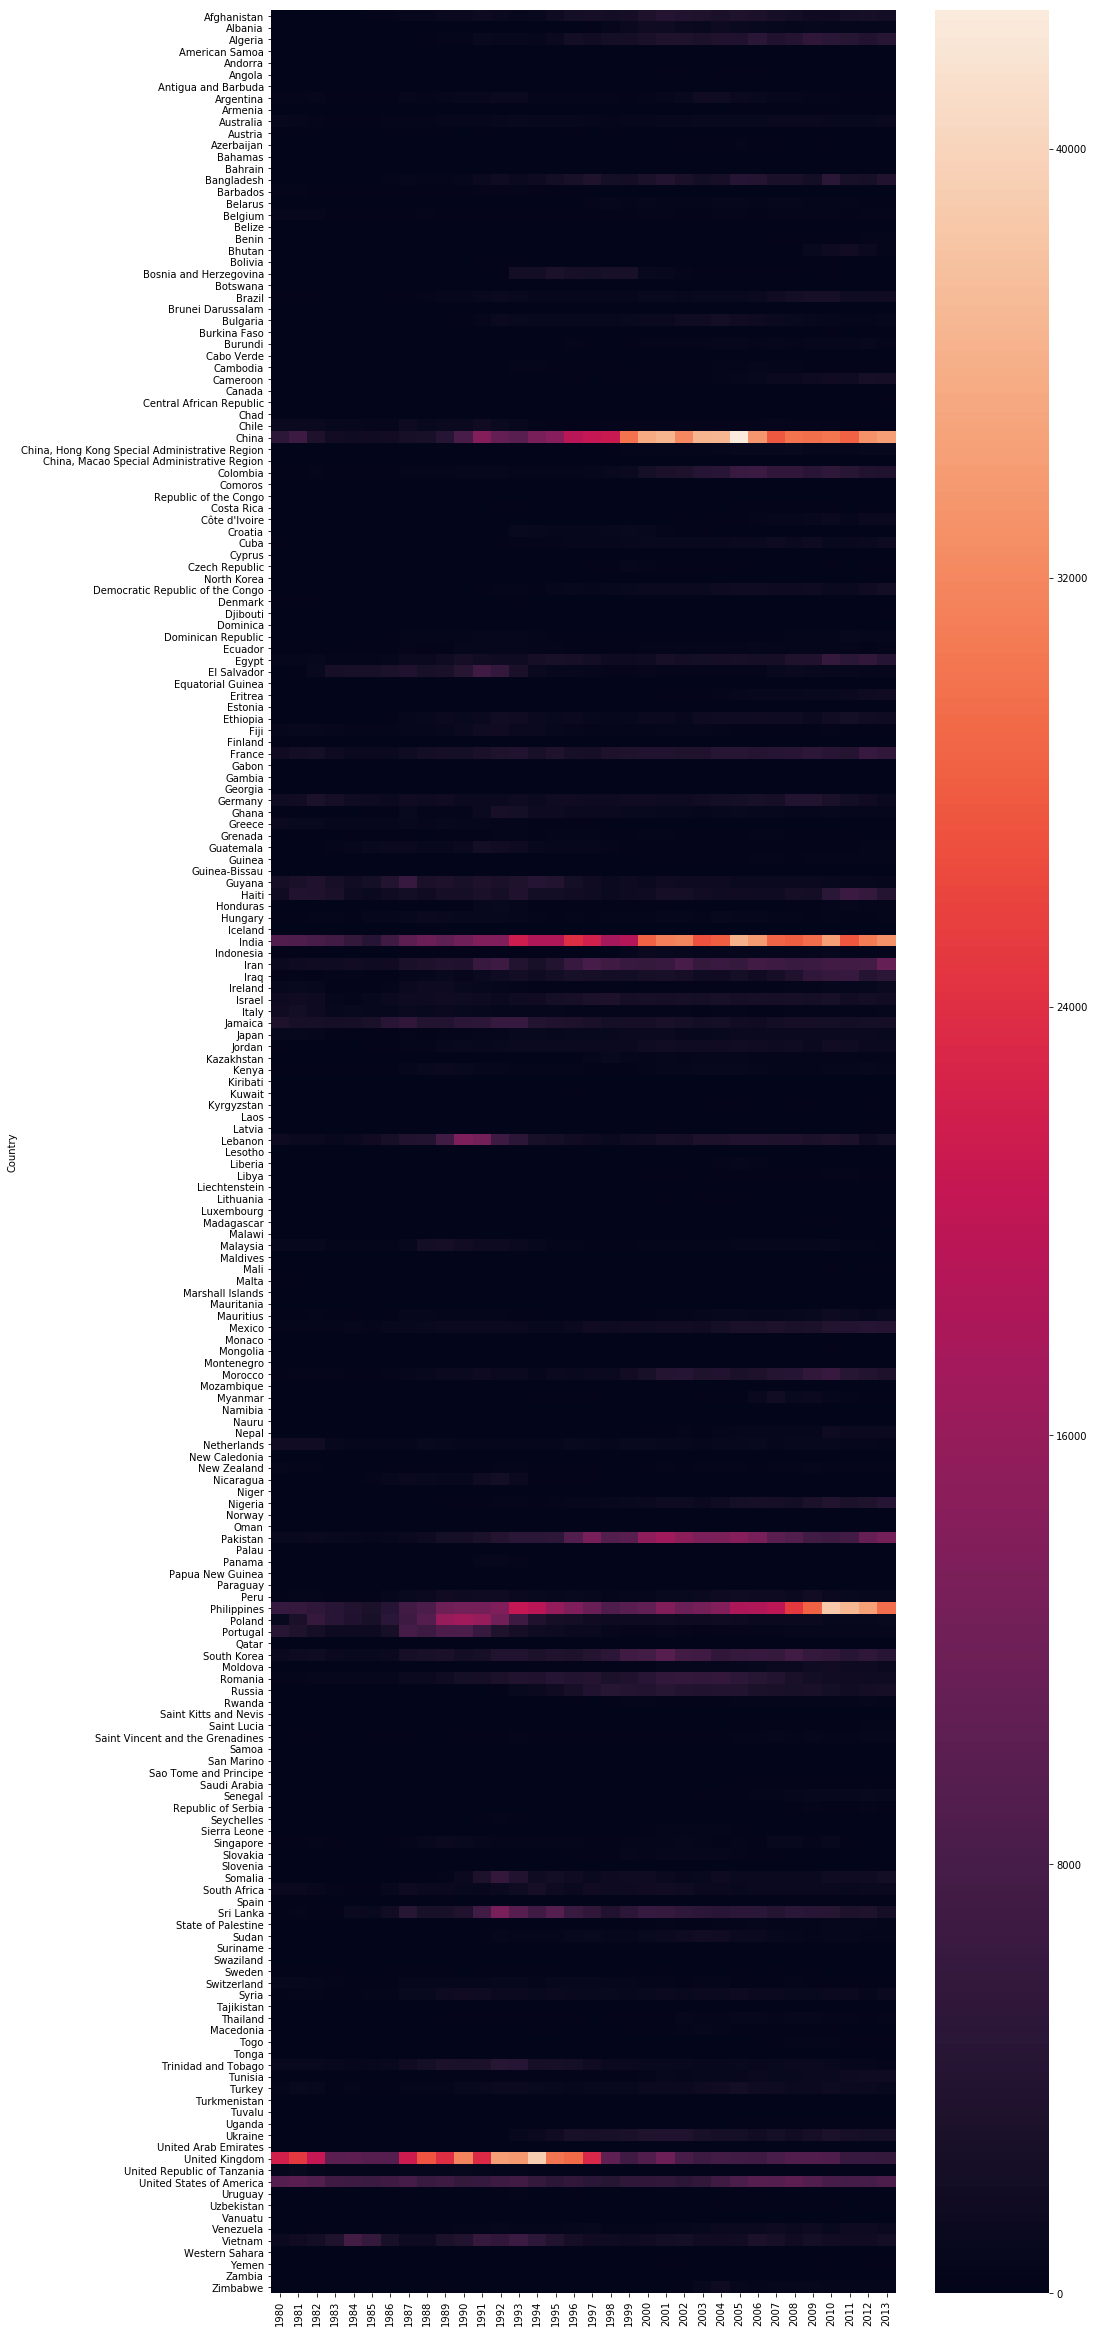

In [25]:
plt.figure(figsize=(14, 42))
ax = sns.heatmap(data=df_canada[years])

## Visualize Word Coulds

In [26]:
# special library for Word Clouds
from wordcloud import WordCloud, STOPWORDS

### Prepare word histogram data

In [31]:
# load list of common words to remove from consideration
stopwords = set(STOPWORDS)

# open the file and read it into a variable
novel = open('data/alice.txt', 'r').read()

# instantiate a word cloud object
novel_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud data
novel_wc.generate(novel)

### Visualize the occurence frequency of words in novel

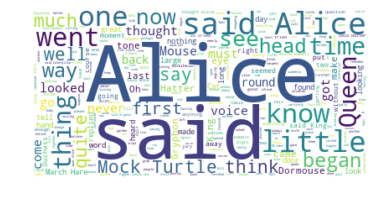

In [32]:
# display the word cloud
plt.imshow(novel_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Visualize the prominent countries contributing to immigration to Canada

In [33]:
# create country wise distribution
df_country = df_canada['Total']

df_country.head()

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
Name: Total, dtype: int64

In [34]:
# generate word cloud from histogram
wc_country = WordCloud(background_color='white').generate_from_frequencies(df_country)

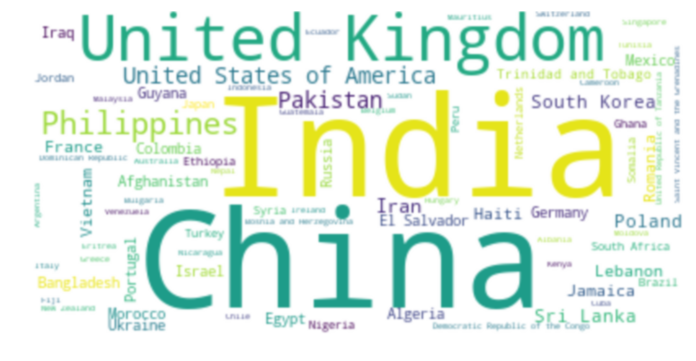

In [39]:
# display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc_country, interpolation='bicubic')
plt.axis('off')
plt.show()